In [25]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import sys 
import os
sys.path.append(os.path.abspath("../"))

In [26]:
from qrcode import QRCodeReader, BitMatrix

In [27]:
import pathlib
from ultralytics import YOLO

# Định nghĩa đường dẫn đến mô hình và ảnh
model_path = "D:\\HK5\\CS406\\TestQR3\\exportmodel\\best2.pt"
# image_path = pathlib.Path("D:\\Data_QR\\data\\qr_2039.jpg")
image_path = pathlib.Path("D:\Data_QR\data\qr_171.jpg")
# Tải mô hình
model = YOLO(model_path)

# Dự đoán trên ảnh với các tùy chọn bổ sung
result = model.predict(source=image_path , conf=0.6, save=True, device='cpu')



image 1/1 D:\Data_QR\data\qr_171.jpg: 448x640 1 qr, 98.0ms
Speed: 2.0ms preprocess, 98.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict222


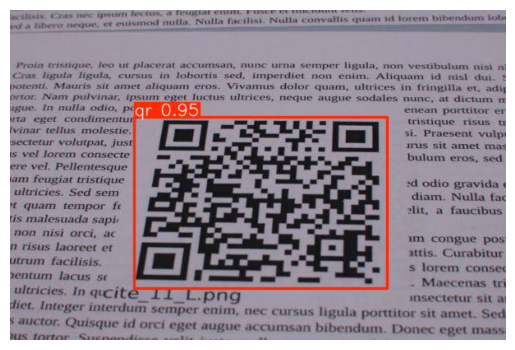

In [28]:
# Hiển thị ảnh (tùy chọn)
img_with_boxes = result[0].plot()
plt.imshow(img_with_boxes)
plt.axis('off')  # Ẩn trục
plt.show()  # Hiển thị ảnh

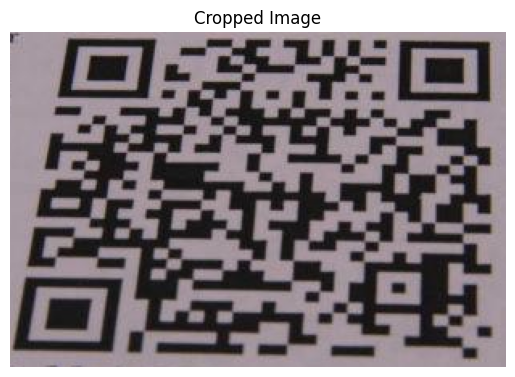

In [29]:
# Đọc ảnh gốc
image = cv2.imread(str(image_path))

# Khởi tạo biến image_crop
image_crop = image

# Lấy bounding box có độ tin cậy cao nhất
for idx, result in enumerate(result):
    if len(result.boxes) > 0:
        # Sắp xếp các box theo độ tin cậy từ cao đến thấp và lấy box đầu tiên
        best_box = sorted(result.boxes, key=lambda box: box.conf[0], reverse=True)[0]
        x_min, y_min, x_max, y_max = map(int, best_box.xyxy[0])  # Lấy tọa độ dạng int

        # Cắt ảnh trong bounding box
        image_crop = image[y_min:y_max, x_min:x_max]
        image_crop = cv2.cvtColor(image_crop, cv2.COLOR_BGR2RGB)
        # Hiển thị hình ảnh đã cắt
        plt.imshow(image_crop)  # Chuyển đổi màu BGR sang RGB
        plt.axis('off')  # Ẩn trục
        plt.title('Cropped Image')  # Tiêu đề cho hình ảnh
        plt.show()  # Hiển thị cửa sổ
    else:
        print(f"Image {idx + 1}: No bounding box detected.")

# GRAY SCALE

In [30]:
print(image_crop.shape)
image_crop = cv2.resize(image_crop, (512,512))
print(image_crop.shape)

(208, 308, 3)
(512, 512, 3)


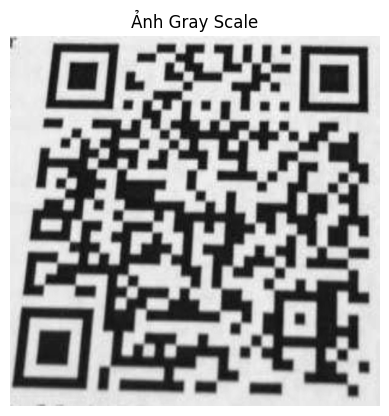

171


In [31]:
from common import CV2ImageLuminanceSource
source = CV2ImageLuminanceSource(image_crop)
plt.imshow(source.image, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.title('Ảnh Gray Scale')
plt.show()
print(np.max(source.image))

In [32]:
print(source.image.shape)

(512, 512)


In [33]:
from common import HybridBinarizer
binarizer = HybridBinarizer(source)

In [34]:
from qrcode import BinaryBitmap
bitmap = BinaryBitmap(binarizer)

<class 'numpy.ndarray'>


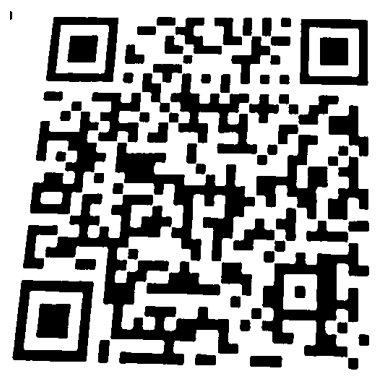

In [35]:
binary_img = bitmap.get_black_matrix().bitmatrix_to_image()
print(type(binary_img))
plt.imshow(binary_img, "gray")
plt.axis("off")
plt.show()

# CREATE QR CODE READER

In [36]:
reader = QRCodeReader()
res = reader.decode(bitmap)
# print(np.max(res.bits))
# print(np.min(res.bits))
# # Hiển thị ảnh nhị phân
# plt.imshow(res.bits, cmap='gray')
# plt.axis('off')  # Ẩn trục
# plt.title('Ảnh Nhị Phân')
# plt.show()

Transform <common.PerspectiveTransform.PerspectiveTransform object at 0x0000017F41848CA0>
ARG 1
Dimension 33 33
POINT [66.07327780018782, 16.44715920420336, 79.10922972436009, 16.561531861944864, 92.15658836944736, 16.676004598069195, 105.21536871366912, 16.79057754398975, 118.28558576148029, 16.905250831350113, 131.36725454362877, 17.020024592024548, 144.4603901172129, 17.13489895811851, 157.56500756573936, 17.249874061969148, 170.6811219991811, 17.364950036145824, 183.80874855403522, 17.480127013450605, 196.94790239338153, 17.595405126918788, 210.09859870694058, 17.710784509819405, 223.26085271113254, 17.826265295655748, 236.43467964913543, 17.941847618165863, 249.6200947909445, 18.057531611323082, 262.81711343343085, 18.173317409336537, 276.02575090040074, 18.289205146651682, 289.24602254265477, 18.405194957950812, 302.4779437380476, 18.52128697815357, 315.72152989154733, 18.637481342417498, 328.9767964352954, 18.753778186138543, 342.2437588286663, 18.87017764495158, 355.52243255832

In [37]:
print(type(res))

<class 'qr_patterns.DetectorResult.DetectorResult'>


In [38]:
img_result = res.bits.bitmatrix_to_image()
print(img_result.astype(np.uint8))

[[0 0 0 ... 0 0 0]
 [0 1 1 ... 1 1 0]
 [0 1 0 ... 0 1 0]
 ...
 [0 1 0 ... 1 1 0]
 [0 1 1 ... 0 1 1]
 [0 0 0 ... 1 0 1]]


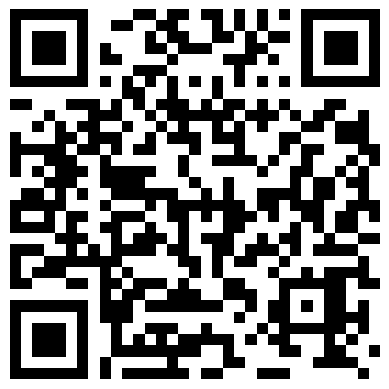

In [39]:
plt.imshow(img_result, "gray")
plt.axis("off")
plt.show()

In [40]:
print(type(img_result))

<class 'numpy.ndarray'>


In [41]:
print(img_result)

[[0 0 0 ... 0 0 0]
 [0 1 1 ... 1 1 0]
 [0 1 0 ... 0 1 0]
 ...
 [0 1 0 ... 1 1 0]
 [0 1 1 ... 0 1 1]
 [0 0 0 ... 1 0 1]]


In [42]:
import cv2
from pyzbar.pyzbar import decode



# Decode mã QR/mã vạch trong ảnh
decoded_objects = decode(img_result)
print(decoded_objects)
# Duyệt qua tất cả các mã được tìm thấy trong ảnh
for obj in decoded_objects:
    print("Data:", obj.data.decode("utf-8"))  # Dữ liệu mã QR/mã vạch
    print("Type:", obj.type)  # Loại mã (QR_CODE, CODE128, v.v.)
    print("Bounding Box:", obj.rect)  # Tọa độ vùng chứa mã


[]


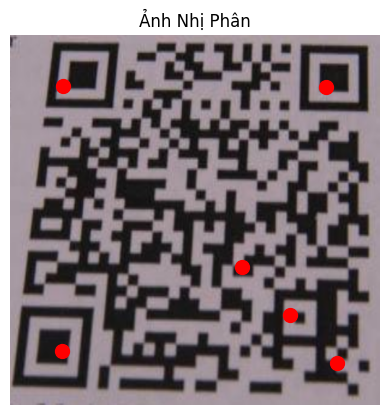

In [43]:
plt.imshow(image_crop)
plt.axis('off')  # Ẩn trục
plt.title('Ảnh Nhị Phân')

x = 72.5  # Tọa độ x
y = 70  # Tọa độ y
plt.plot(x, y, 'ro', markersize=10)  

x = 437  # Tọa độ x
y = 70.5  # Tọa độ y
plt.plot(x, y, 'ro', markersize=10)  

x = 72  # Tọa độ x
y = 437  # Tọa độ y
plt.plot(x, y, 'ro', markersize=10)  

x = 321  # Tọa độ x
y = 321  # Tọa độ y
plt.plot(x, y, 'ro', markersize=10)  

x = 453  # Tọa độ x
y = 453  # Tọa độ y
plt.plot(x, y, 'ro', markersize=10) 

x = 387  # Tọa độ x
y = 387  # Tọa độ y
plt.plot(x, y, 'ro', markersize=10) 
plt.show()